# Analyses of multiple large populations

In [3]:
import pickle
import gzip
import numpy as np
import pandas as pd
from scipy import stats
from tqdm import tqdm

import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ThesisScripts.MyModel import *
from ThesisScripts.Analyses import *

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

## Load data

In [4]:
%%time

# SELECTION = 0.3 POPULATIONS
prefix = '../../Simulations/Ensemble-simulations/saved_simulations/large-selection_0p3-1000_MultiSim/'
selection_0p3 = []

for i in range(1000):
    file_path = prefix + 'population_' + '%s' %(i) + '.pkl.gz'
    data = pd.read_pickle(file_path, compression='gzip')
    selection_0p3.append(data)
print(len(selection_0p3))
print(type(selection_0p3[0]))

1000
<class 'pandas.core.frame.DataFrame'>
CPU times: user 1min 55s, sys: 55.2 s, total: 2min 50s
Wall time: 3min 6s


## Maximum allele frequencies

In [5]:
%%time
selection_0p3_MaxAFs = get_max_AFs(selection_0p3, det_lim=100)

CPU times: user 4.84 s, sys: 13.2 s, total: 18.1 s
Wall time: 45.6 s


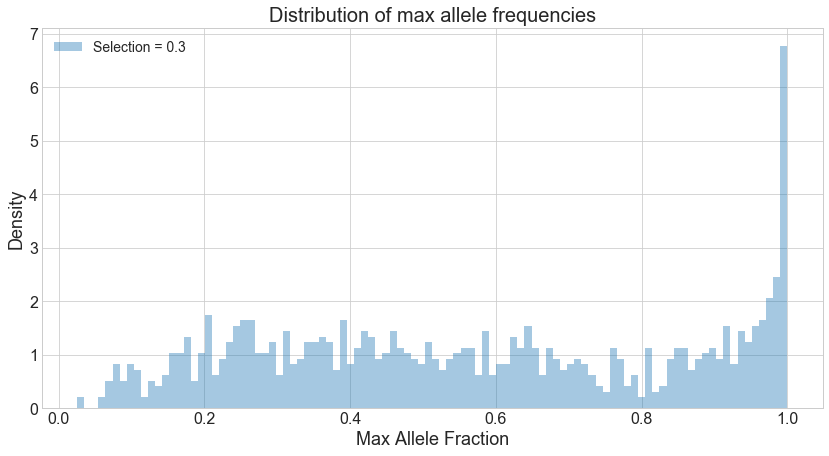

In [6]:
sns.distplot(selection_0p3_MaxAFs, bins=100, norm_hist=True, kde=False, label="Selection = 0.3");
plt.title('Distribution of max allele frequencies');
plt.xlabel('Max Allele Fraction');
plt.ylabel('Density');
#plt.ylim(0, 5);
plt.legend();
plt.savefig('./Figures/MultiSim-Large-1000_sim/Large-selection_0p3-MaxAFs.png')
plt.show()

## Heterogeneity

In [8]:
#%%time
#selection_0p3_H = get_heterogeneity(selection_0p3, det_lim=100)

CPU times: user 3.94 s, sys: 7.72 s, total: 11.7 s
Wall time: 17.7 s


In [7]:
data = pd.read_csv('./simulation_data/Large-selection_0p3-1000_sim-Analyzed_data.csv')
selection_0p3_H = data["selection_0p3_H"].values

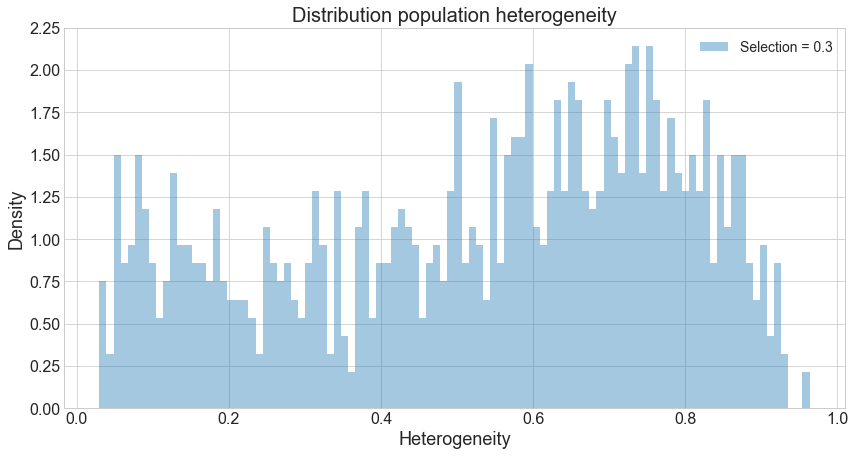

In [8]:
sns.distplot(selection_0p3_H, bins=100, norm_hist=True, kde=False, label="Selection = 0.3");
plt.title('Distribution population heterogeneity');
plt.xlabel('Heterogeneity');
plt.ylabel('Density');
plt.legend();
plt.savefig('./Figures/MultiSim-Large-1000_sim/Large-selection_0p3-Heterogeneity.png')
plt.show()

## Mutational burden (number of mutations distrbution)

In [10]:
%%time
selection_0p3_mut_distr = get_mutation_distributions(selection_0p3, det_lim=100)

CPU times: user 1min 21s, sys: 7.17 s, total: 1min 28s
Wall time: 1min 40s


In [11]:
selection_0p3_mut_distr.to_csv('../Analysis-Data/Large-1000_sim-selection_0p3_mut_distr.csv')

In [27]:
selection_0p3_mut_distr.head()

# mutations,1,2,3,4,5
Population 0,102686773.0,12551127.0,78811.0,552.0,NaN
Population 1,77073083.0,13614364.0,74902.0,110.0,NaN
Population 2,107759722.0,7691771.0,80390.0,130862.0,2612.0
Population 3,72379758.0,2585539.0,40932.0,NaN,NaN
Population 4,5630595.0,99489549.0,3752517.0,998544.0,1240.0


In [12]:
selection_0p3_avg_nmd = selection_0p3_mut_distr.mean()
selection_0p3_std_nmd = selection_0p3_mut_distr.std()

In [13]:
%%time
selection_0p3_avg_num_mut = avg_num_mutations(selection_0p3_avg_nmd)

CPU times: user 1.77 ms, sys: 345 µs, total: 2.12 ms
Wall time: 2.92 ms


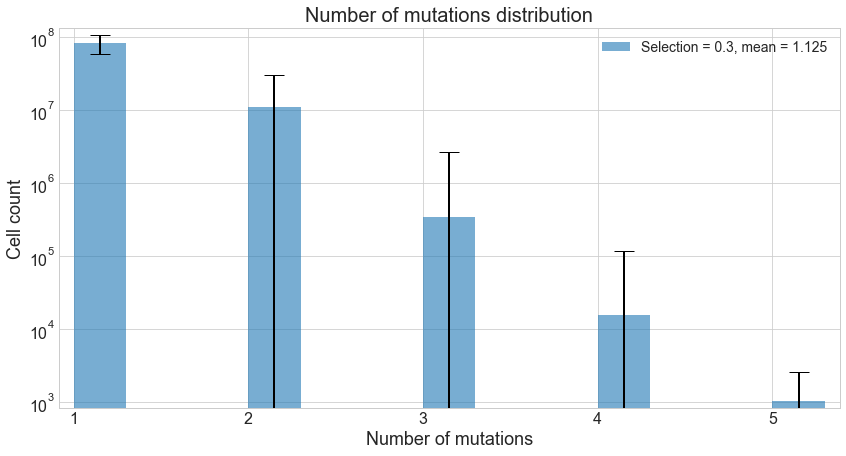

In [14]:
selection_0p3_errors = selection_0p3_std_nmd.values

plt.bar(left=selection_0p3_avg_nmd.index+0.15, height=selection_0p3_avg_nmd.values, width=0.3, alpha=0.6, align='center',
        yerr=selection_0p3_errors, capsize=10, 
        label="Selection = 0.3, mean = %s" %(round(selection_0p3_avg_num_mut, 3)));

plt.title("Number of mutations distribution");
plt.xlabel('Number of mutations');
plt.ylabel('Cell count');
plt.yscale('log');
plt.xticks(list(selection_0p3_avg_nmd.index));
plt.margins(0.02);
plt.legend();
plt.savefig('./Figures/MultiSim-Large-1000_sim/Large-selection_0p3-Num_mutations.png')
plt.show()

## Total number of mutations

In [19]:
%%time
selection_0p3_total_m = get_total_mutations(selection_0p3, det_lim=1)

CPU times: user 13.2 s, sys: 40.1 s, total: 53.3 s
Wall time: 1min 51s


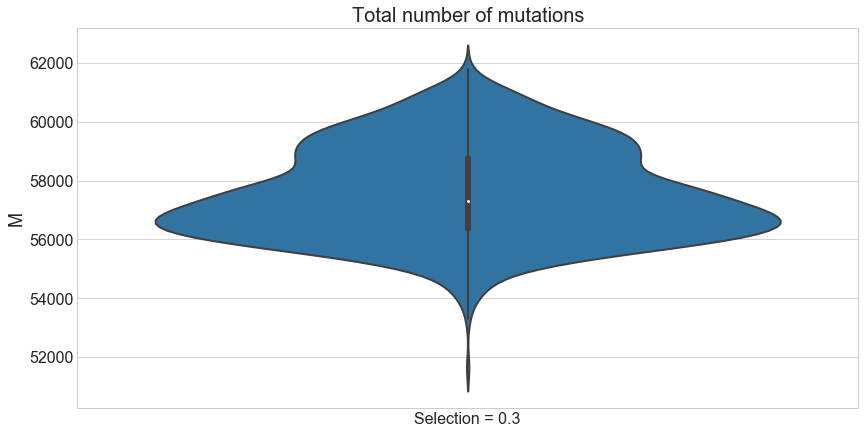

In [20]:
sns.violinplot(data=[selection_0p3_total_m]);
plt.title("Total number of mutations");
plt.ylabel("M");
plt.xticks([0], ["Selection = 0.3"]);
plt.savefig('./Figures/MultiSim-Large-1000_sim/Large-selection_0p3-Total_num_mutations.png')
plt.show()

## Errors in reconstruction of mutational timeline

Make sure that the vaue for **alpha** is correct!

In [21]:
alpha = 0.3

In [24]:
%%time
selection_0p3_rec_errors = get_reconstruction_errors(selection_0p3, alpha, det_lim=100)

CPU times: user 2min 49s, sys: 11.2 s, total: 3min
Wall time: 3min 22s


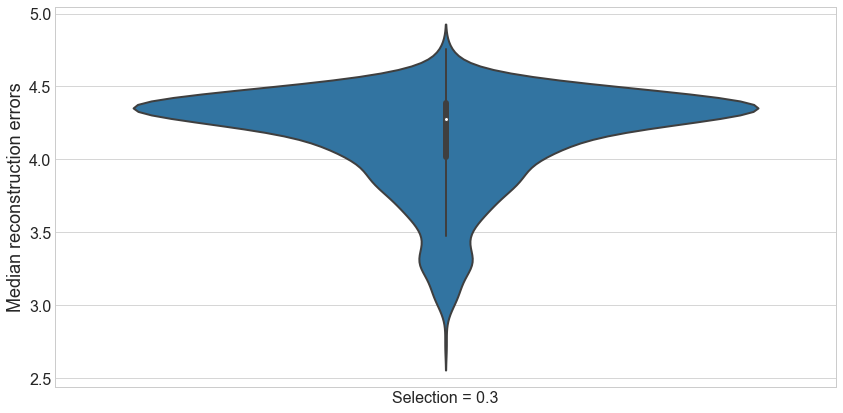

In [25]:
sns.violinplot(data=[selection_0p3_rec_errors]);
plt.ylabel("Median reconstruction errors");
plt.xticks([0], ["Selection = 0.3"]);
plt.savefig('./Figures/MultiSim-Large-1000_sim/Large-selection_0p3-Rec_errors.png')
plt.show()

## Export data

In [26]:
d = pd.DataFrame()
d["selection_0p3_MaxAFs"] = selection_0p3_MaxAFs
d["selection_0p3_H"] = selection_0p3_H
d["selection_0p3_total_m"] = selection_0p3_total_m
d["selection_0p3_rec_errors"] = selection_0p3_rec_errors

d.to_csv('../Analysis-Data/Large-selection_0p3-1000_sim-Analyzed_data.csv')